# K-Means Clustering 

- k-means merupakan algoritma clustering non-hirarki yang membagi data ke satu atau lebih kelompok.
- K-means akan mengelompokan data kedalam satu cluster pada data yang memiliki karakteristik mirip dan akan dikelompokan ke cluster yang lain jika tidak mirip.

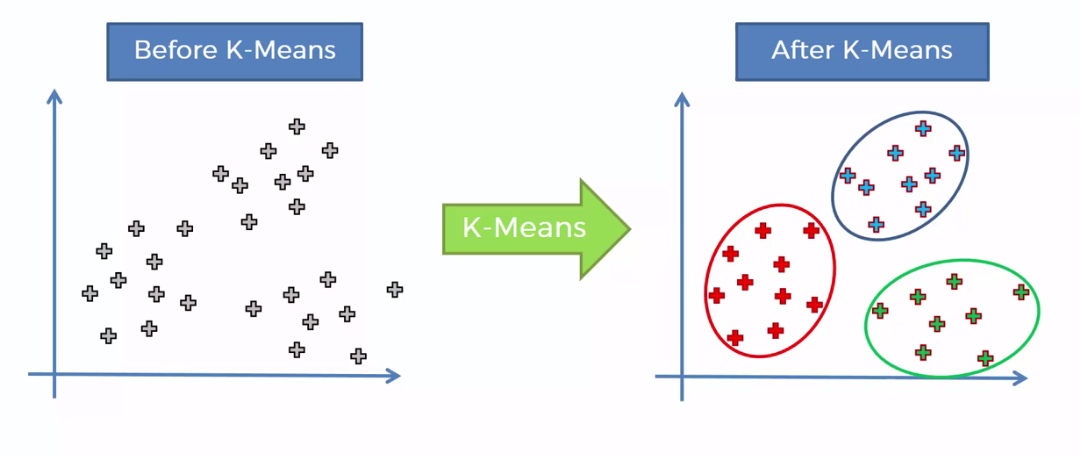

Berikut langkah-langkah k-means clustering,
- menentukan jumlah k (banyak cluster)
- Inisialisasi Cluster Centroid (rata-rata) atau `mean` secara acak. Cluster Centroid adalah titik pusat pada masing-masing cluster
- menghitung jarak menggunakan ecuclidian distance
- kelompokan data ke dalam cluster dengan jarak yang paling dekat atau minim dari centroid
- menghitung nilai centroid yang baru menggunakan rumus tertentu
- ulangi langkah diatas terus menerus sampai data menjadi konvergen (tidak berubah/tetap)

## 1. Import Library

melakukan import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## 2. Membaca Data

In [2]:
df = pd.read_excel("dataset/dataset_gizi.xlsx")
df

,No,Balita ke-,TB,BB
0,1,Balita 1,52.0,5.8
1,2,Balita 2,51.0,5.0
2,3,Balita 3,71.5,8.5
3,4,Balita 4,55.0,5.5
4,5,Balita 5,92.5,6.5
5,6,Balita 6,46.5,5.7
6,7,Balita 7,75.0,8.0
7,8,Balita 8,99.0,11.0
8,9,Balita 9,88.0,9.4
9,10,Balita 10,71.0,6.2


## 3. Memilih Fitur untuk Cluster

In [3]:
df_x = df.iloc[:, 2:4]
df_x.head()

,TB,BB
0,52.0,5.8
1,51.0,5.0
2,71.5,8.5
3,55.0,5.5
4,92.5,6.5


## 4. Visualisasi Sebaran Data

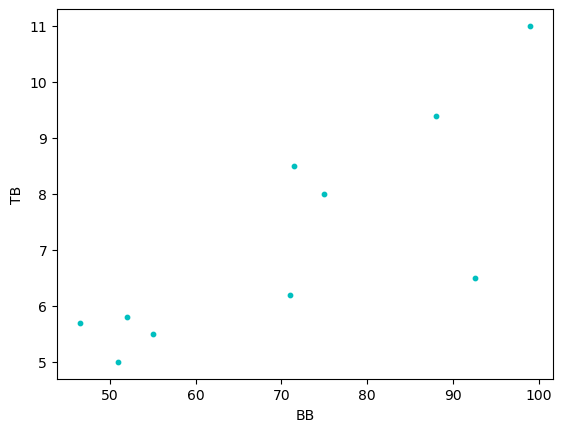

In [12]:
plt.scatter(df.TB, df.BB, s =10, c = "c", marker = "o", alpha = 1)
plt.xlabel('BB')
plt.ylabel('TB')
plt.show()

## 5. Melakukan Normalisasi Data

normalisasi data dilakukan karena adanya perbedaan satuan antara kolom `BB` dan kolom `TB`. Beberapa tahapan dalam normalisasi data yaitu,
1. mengubah dataframe menjadi array 
2. menggunakan `MinMaxScaler()`

In [5]:
x_array = np.array(df_x)
print(x_array)

[[52.   5.8]
 [51.   5. ]
 [71.5  8.5]
 [55.   5.5]
 [92.5  6.5]
 [46.5  5.7]
 [75.   8. ]
 [99.  11. ]
 [88.   9.4]
 [71.   6.2]]


In [6]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.1047619 , 0.13333333],
       [0.08571429, 0.        ],
       [0.47619048, 0.58333333],
       [0.16190476, 0.08333333],
       [0.87619048, 0.25      ],
       [0.        , 0.11666667],
       [0.54285714, 0.5       ],
       [1.        , 1.        ],
       [0.79047619, 0.73333333],
       [0.46666667, 0.2       ]])

## 6. Pemodelan K-Means

Pemodelan K-Means dapat dilakukan dengan menggunakan fungsi `KMeans`. Fungsi ini memerlukan parameter `n_cluster` yang menunjukan banyaknya cluster yang ingin dibuat. Setelah itu proses pemodelan dijalankan dengan menggunakan method `.fit()` terhadap data yang sudah dilakukan normalisasi sebelumnya.

In [7]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)


C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Akmal Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=123)

### Menampilkan Hasil Cluster K-Means

In [8]:
print(kmeans.cluster_centers_)

[[0.50952381 0.54166667]
 [0.08809524 0.08333333]
 [0.8952381  0.86666667]
 [0.87619048 0.25      ]
 [0.46666667 0.2       ]]


**insight:**
- nilai diatas adalah titik centroid masing-masing pada 5 cluster
- selanjutnya setiap baris/observasi pada dataframe yang digunakan akan dikategegorikan ke dalam cluster tertentu

In [9]:
df["cluster"] =kmeans.labels_
df

,No,Balita ke-,TB,BB,cluster
0,1,Balita 1,52.0,5.8,1
1,2,Balita 2,51.0,5.0,1
2,3,Balita 3,71.5,8.5,0
3,4,Balita 4,55.0,5.5,1
4,5,Balita 5,92.5,6.5,3
5,6,Balita 6,46.5,5.7,1
6,7,Balita 7,75.0,8.0,0
7,8,Balita 8,99.0,11.0,2
8,9,Balita 9,88.0,9.4,2
9,10,Balita 10,71.0,6.2,4


**insight:**
- pada dataframe diatas telah ditambahkan kolom `cluster` dimana setiap baris masuk kedalam cluster tertentu

## 7. Visualisasi Hasil Cluster 

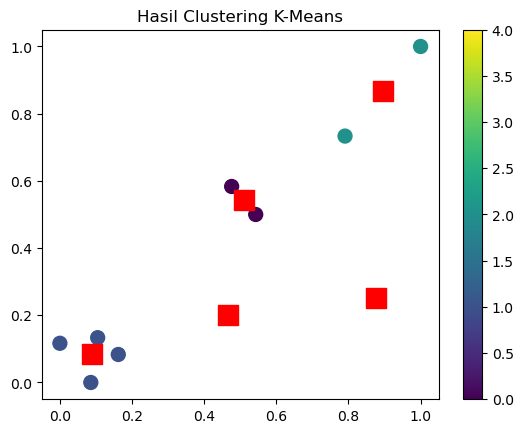

In [10]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.cluster, marker = "o", alpha = 1,)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1, marker='s');

plt.title("Hasil Clustering K-Means")
plt.colorbar(output)

plt.show()

**insight:**
- pada gambar diatas, terdapat 5 titik centroid (kotak merah). sementara data divisualisasikan ke dalam titik berbentuk lingkaran
- cluster 0 dan 4 tidak terlihat datanya karena ditutupi centroid 

# Kelebihan dan Kekurangan

## Kelebihan
- Prosesnya mudah dan sederhana terutama pada dataset kompleks
- sangat fleksible terhadap perubahan data karena algoritma ini akan menyesuaikan dengan cluster yang terbaru
- cocok untuk dataset berjumlah besar
- komputasinya tidak mahal
- hasil clustering mudah dijelaskan
- akurasi dapat dtingkatkan berdasarkan jumlah cluster

## Kekurangan
- sensitif terhadap scalling data 
- algoritma ini hanya bekerja pada data numerik
- sulit membandingkan kualitas cluster yang dihasilkan karena tergantung nilai k